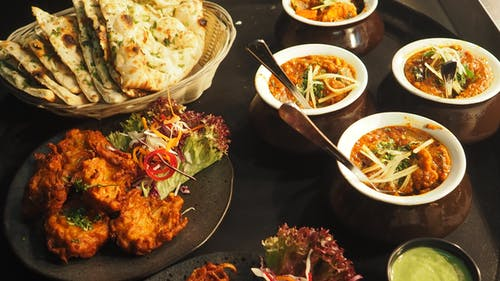

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df=pd.read_csv('/kaggle/input/indian-food-101/indian_food.csv')
df.head()

In [ ]:
df.info()

There are 2 Numerical columns and 7 categorical columns in the dataframe.

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

There are no NaN values in the dataframe except in the region column

In [ ]:
df['region'].unique()

In [ ]:
df.shape

In [ ]:
df=df[df.region!='-1']
df=df.dropna()

In [ ]:
df['region'].unique()

All the rows with region value NaN or -1 have been removed.

For all the categorical values, checking the different types of categories.

In [ ]:
df['flavor_profile'].unique()

In [ ]:
df = df[df['region']!='-1']
df['region'].unique()

In [ ]:
df = df[df['flavor_profile']!='-1']
df['flavor_profile'].unique()

In [ ]:
df = df[df['state']!='-1']
df['state'].unique()

In [ ]:
df['diet'].value_counts().plot(kind='bar')

The number of vegerarian dishes in India are far greater than non veg dishes.


In [ ]:
df_grouped=df.groupby('diet')['prep_time'].mean()
df_grouped.reset_index()

In [ ]:
df_grouped.plot.pie(subplots=True, figsize=(11, 6))

The average prep time of non veg dishes is 27.06 and of veg dishes is 31.62. Looks like the average prep time of non veg dishes is less than that of veg dishes.

In [ ]:
df_grouped=df.groupby('diet')['cook_time'].mean()
df_grouped.reset_index()

In [ ]:
df_grouped.plot.pie(subplots=True, figsize=(11, 6))

The average cook time of non veg dishes is 25.86 while the average cook time of veg dishes is 35.64. Looks like the time taken to cook vegetarian dishes is much more than the time taken to cook nonveg dishes.


In [ ]:
dfgrouped1=df.groupby(['state','flavor_profile']).size().reset_index(name='counts')
dfgrouped1

In [ ]:
dfgrouped2=dfgrouped1.groupby(['state'])['counts'].max()
dfgrouped2

In [ ]:
dfgrouped1.groupby(['state','flavor_profile','counts'],as_index=False).max()

In [ ]:
df['ingredients'].isnull().values.any()

In [ ]:
def generateWordcloud(text,title):
    india_mask=np.array(Image.open('/kaggle/input/indiamap6/indiamap6.png'))
 
    from wordcloud import WordCloud, STOPWORDS
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white', mask=india_mask, mode='RGB',
               width=500, max_words=1000, height=500,
               random_state=1, contour_width=1, contour_color='steelblue')
    wc.generate(text)
    plt.figure(figsize=(5, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.tight_layout(pad=0)
    plt.title(title)
    plt.axis('off')
    return plt

In [ ]:
text1=""

import matplotlib.pyplot as plt
for ind in df.index: 
     x=df['ingredients'][ind]
     text1=text1+x
    
fig=generateWordcloud(text1,"Ingredients used in Indian dishes")
fig.show()


In [ ]:
df_sweet=df[df['flavor_profile']=='sweet']
df_sweet.head()

text1=""

import matplotlib.pyplot as plt
for ind in df_sweet.index: 
     x=df_sweet['ingredients'][ind]
     text1=text1+x

fig=generateWordcloud(text1,"Ingredients used in Indian Sweets")
fig.show()


In [ ]:
df_spicy=df[df['flavor_profile']=='spicy']
df_spicy.head()
text1=""

import matplotlib.pyplot as plt
for ind in df_spicy.index:
    x=df_spicy['ingredients'][ind]
    text1=text1+x
    
     
fig=generateWordcloud(text1,"Ingredients used in Indian spicy food")
fig.show()